#Data Preparation:

In [2]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

     |████████████████████████████████| 261 kB 5.6 MB/s 
     |████████████████████████████████| 690 kB 43.7 MB/s 
     |████████████████████████████████| 3.1 MB 40.2 MB/s 
     |████████████████████████████████| 303 kB 50.2 MB/s 
     |████████████████████████████████| 596 kB 48.3 MB/s 
     |████████████████████████████████| 10.9 MB 40.4 MB/s 
     |████████████████████████████████| 102 kB 6.9 MB/s 
     |████████████████████████████████| 63 kB 356 kB/s 
     |████████████████████████████████| 812 kB 45.6 MB/s 
     |████████████████████████████████| 38.1 MB 2.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=05c0b89907e8fe4234c8a066a344588502300b05e5cfb57b9767fdac2fb85896
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=a634dfc95d85f1664c539ad922af566656490b28bb44303388be2f6d0f0a6245
  

In [3]:
from google.colab import files
uploaded = files.upload()

Saving german_credit..arff to german_credit..arff


In [4]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="german_credit..arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    df[col] = df[col].str.decode('utf-8')

print(df.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [ ]:
df.head(10)

Creditability Account Balance  Duration of Credit (month)  \
0             1               1                        18.0   
1             1               1                         9.0   
2             1               2                        12.0   
3             1               1                        12.0   
4             1               1                        12.0   
5             1               1                        10.0   
6             1               1                         8.0   
7             1               1                         6.0   
8             1               4                        18.0   
9             1               2                        24.0   

  Payment Status of Previous Credit Purpose  Credit Amount  \
0                                 4       2         1049.0   
1                                 4       0         2799.0   
2                                 2       9          841.0   
3                                 4       0         2122.0   
4                                 4       0         2171.0   
5                                 4       0         2241.0   
6                                 4       0         3398.0   
7                                 4       0         1361.0   
8                                 4       3         1098.0   
9                                 2       3         3758.0   

  Value Savings/Stocks Length of current employment  Instalment per cent  \
0                    1                            2                  4.0   
1                    1                            3                  2.0   
2                    2                            4                  2.0   
3                    1                            3                  3.0   
4                    1                            3                  4.0   
5                    1                            2                  1.0   
6                    1                            4                  1.0   
7                    1                            2                  2.0   
8                    1                            1                  4.0   
9                    3                            1                  1.0   

  Sex & Marital Status  ... Duration in Current address  \
0                    2  ...                           4   
1                    3  ...                           2   
2                    2  ...                           4   
3                    3  ...                           2   
4                    3  ...                           4   
5                    3  ...                           3   
6                    3  ...                           4   
7                    3  ...                           4   
8                    2  ...                           4   
9                    2  ...                           4   

  Most valuable available asset Age (years)  Concurrent Credits  \
0                             2        21.0                   3   
1                             1        36.0                   3   
2                             1        23.0                   3   
3                             1        39.0                   3   
4                             2        38.0                   1   
5                             1        48.0                   3   
6                             1        39.0                   3   
7                             1        40.0                   3   
8                             3        65.0                   3   
9                             4        23.0                   3   

  Type of apartment No of Credits at this Bank  Occupation No of dependents  \
0                 1                        1.0           3              1.0   
1                 1                        2.0           3              2.0   
2                 1                        1.0           2              1.0   
3                 1                        2.0           2              2.0   
4    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [ ]:
df.describe()

Duration of Credit (month)  Credit Amount  Instalment per cent  \
count                 1000.000000     1000.00000          1000.000000   
mean                    20.903000     3271.24800             2.973000   
std                     12.058814     2822.75176             1.118715   
min                      4.000000      250.00000             1.000000   
25%                     12.000000     1365.50000             2.000000   
50%                     18.000000     2319.50000             3.000000   
75%                     24.000000     3972.25000             4.000000   
max                     72.000000    18424.00000             4.000000   

       Age (years)  No of Credits at this Bank  No of dependents  
count   1000.00000                 1000.000000       1000.000000  
mean      35.54200                    1.407000          1.155000  
std       11.35267                    0.577654          0.362086  
min       19.00000                    1.000000          1.000000  
25%       27.00000                    1.000000          1.000000  
50%       33.00000                    1.000000          1.000000  
75%       42.00000                    2.000000          1.000000  
max       75.00000                    4.000000          2.000000

In [ ]:
# list all unique values in each attribute
df.nunique()

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

In [ ]:
# check for any missing values
df.isna().any().any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0716486050>,
      dtype=object)

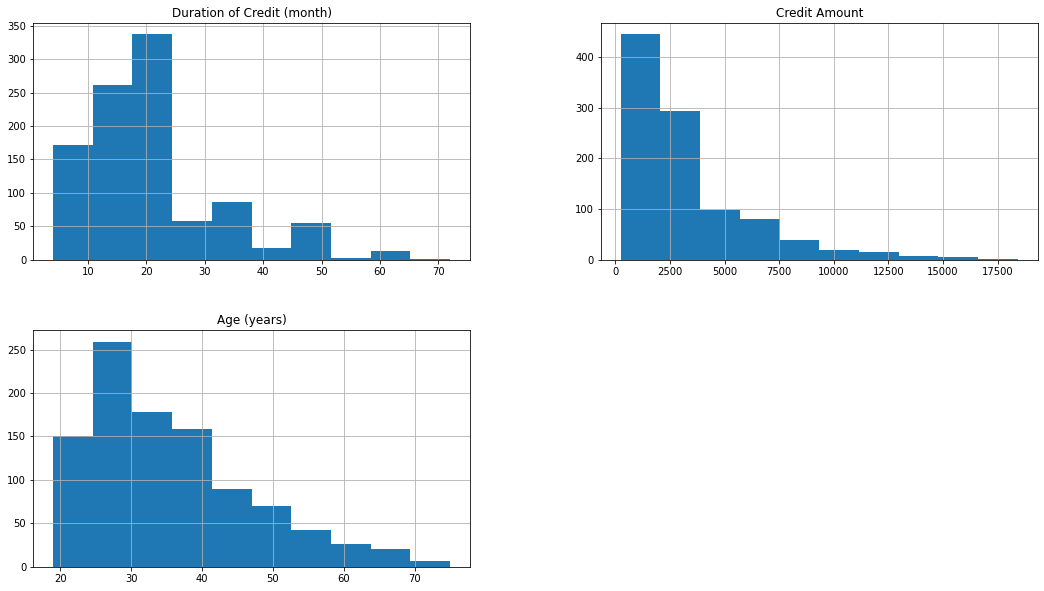

In [ ]:
# Plotting histograms of multiple columns together for data distribution
df.hist(['Duration of Credit (month)','Credit Amount', 'Age (years)'], figsize=(18,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

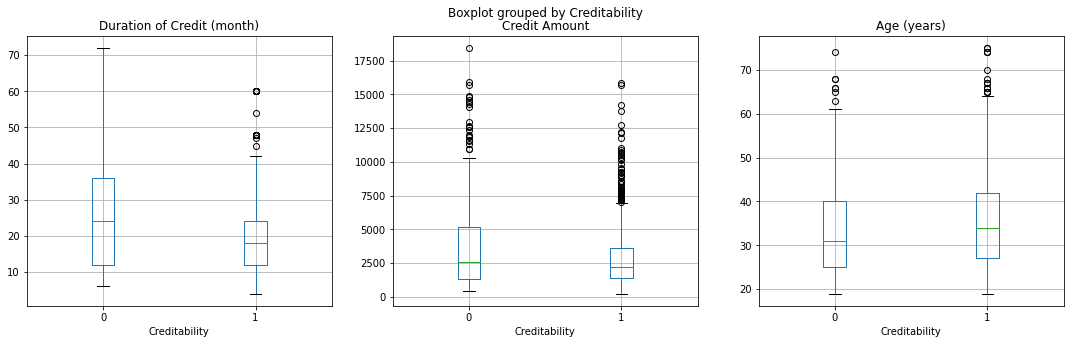

In [7]:
# Box plots for Categorical Target Variable "Creditability" and Quantitative predictors
QuantColsList=['Duration of Credit (month)','Credit Amount', 'Age (years)']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(QuantColsList), figsize=(18,5))

# Creating box plots for each quantitative predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(QuantColsList, range(len(QuantColsList))):
    df.boxplot(column=PredictorCol, by='Creditability', figsize=(5,5), vert=True, ax=PlotCanvas[i])

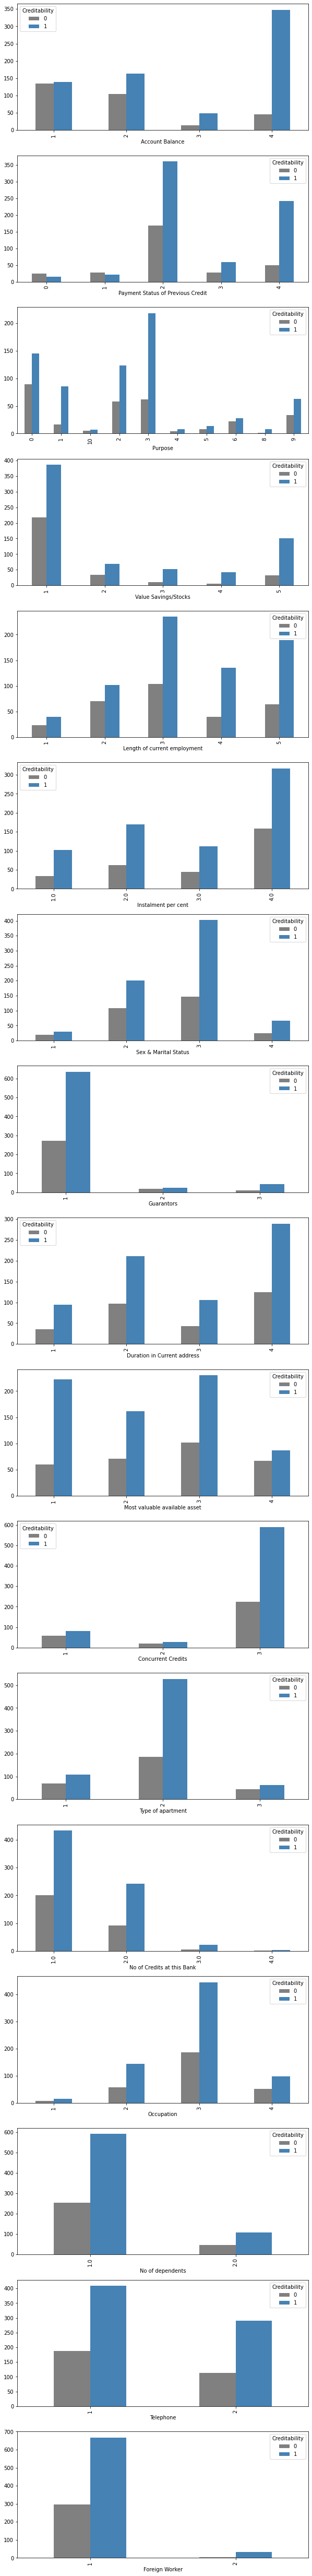

In [8]:
# Bar charts for Categorical Target Variable "Creditability" and Categorical predictors
CategoricalColsList=['Account Balance', 'Payment Status of Previous Credit', 'Purpose','Value Savings/Stocks','Length of current employment',
                     'Instalment per cent', 'Sex & Marital Status', 'Guarantors','Duration in Current address', 'Most valuable available asset',
                     'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 
                     'Foreign Worker']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Creditability"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Creditability'])
    CrossTabResult.plot.bar(color=['grey','steelblue'], ax=PlotCanvas[i])

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If p-value <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '- P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '- P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
ContinuousVariables=['Duration of Credit (month)','Credit Amount', 'Age (years)']
FunctionAnova(inpData=df, TargetVariable='Creditability', ContinuousPredictorList=ContinuousVariables)

Duration of Credit (month) is correlated with Creditability - P-Value: 6.488049877187189e-12
Credit Amount is correlated with Creditability - P-Value: 8.795399017206301e-07
Age (years) is correlated with Creditability - P-Value: 0.003868455281308189


['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If p-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '- P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '- P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [ ]:
CategoricalVariables=['Account Balance', 'Payment Status of Previous Credit', 'Purpose','Value Savings/Stocks','Length of current employment',
                     'Instalment per cent', 'Sex & Marital Status', 'Guarantors','Duration in Current address', 'Most valuable available asset',
                     'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 
                     'Foreign Worker']

FunctionChisq(inpData=df, 
              TargetVariable='Creditability',
              CategoricalVariablesList= CategoricalVariables)

Account Balance is correlated with Creditability - P-Value: 1.2189020722893755e-26
Payment Status of Previous Credit is correlated with Creditability - P-Value: 1.2791872956750918e-12
Purpose is correlated with Creditability - P-Value: 0.00011574910079691586
Value Savings/Stocks is correlated with Creditability - P-Value: 2.761214238568249e-07
Length of current employment is correlated with Creditability - P-Value: 0.0010454523491402541
Instalment per cent is NOT correlated with Creditability - P-Value: 0.1400333122128481
Sex & Marital Status is correlated with Creditability - P-Value: 0.02223800546926877
Guarantors is correlated with Creditability - P-Value: 0.036055954027247206
Duration in Current address is NOT correlated with Creditability - P-Value: 0.8615521320413175
Most valuable available asset is correlated with Creditability - P-Value: 2.8584415733250017e-05
Concurrent Credits is correlated with Creditability - P-Value: 0.0016293178186473534
Type of apartment is correlated wi

['Account Balance',
 'Payment Status of Previous Credit',
 'Purpose',
 'Value Savings/Stocks',
 'Length of current employment',
 'Sex & Marital Status',
 'Guarantors',
 'Most valuable available asset',
 'Concurrent Credits',
 'Type of apartment',
 'Foreign Worker']

#Predictive Modeling/Classication:

In [9]:
#unfiltered dataset
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.2,random_state=1)

In [ ]:
#unfiltered dataset
#from sklearn import tree
import sklearn
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

NameError: ignored

class Names ['1' '0']


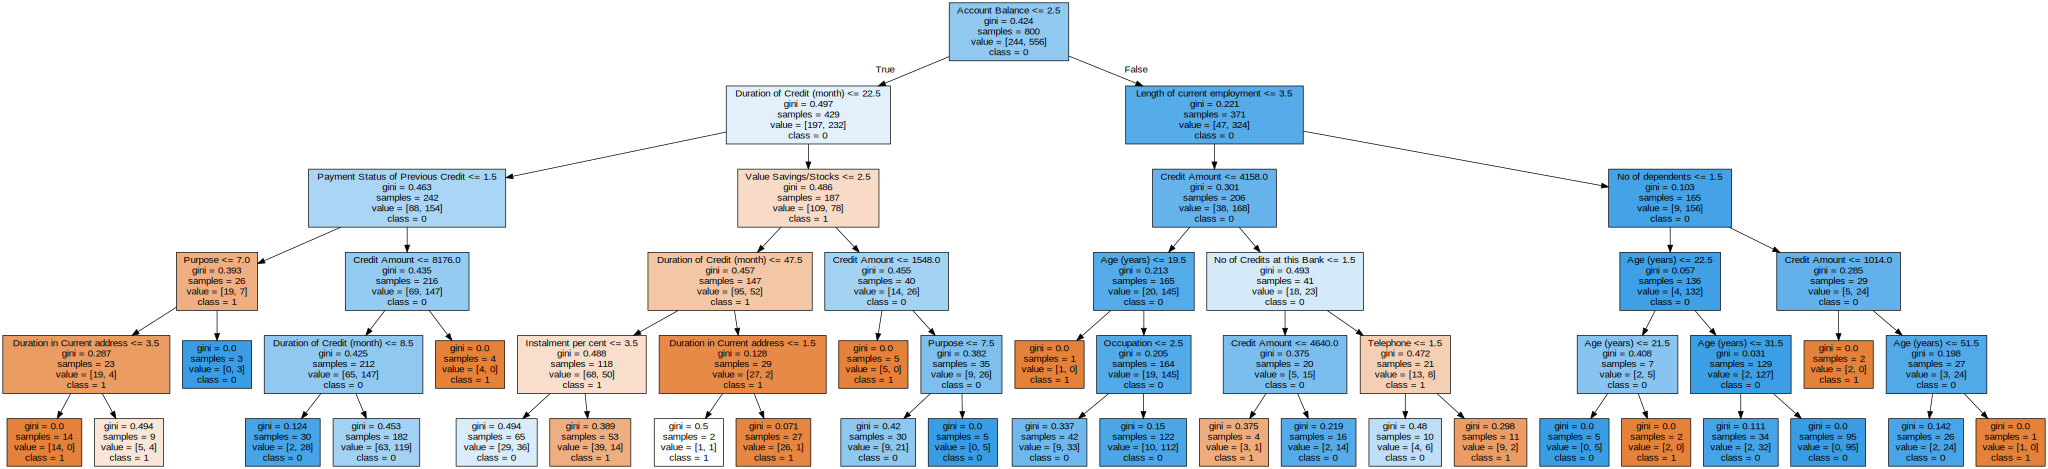

In [ ]:
#unfiltered dataset
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
#unfiltered dataset
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)
y_pred

array(['0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1

In [ ]:
#unfiltered data set
clf.score(X_test, y_test)

0.7

In [ ]:
#unfiltered data set
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 17  39]
 [ 21 123]]
TP:  123 , FP:  39 , TN:  17 , FN: 21


In [ ]:
#unfiltered data set
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36        56
           1       0.76      0.85      0.80       144

    accuracy                           0.70       200
   macro avg       0.60      0.58      0.58       200
weighted avg       0.67      0.70      0.68       200



In [ ]:
#unfiltered data set
#lets make a prediction on the data set by creating a new data point that is similar to the first row of the dataset and check with the actual first column and determine weather the model predicted correctly or not.
clf.predict([[1,3,3,9,1200,2,4,1,4,1,4,1,30,1,2,1,4,1,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['1'], dtype=object)

In [ ]:
#filtered data set
dummy_data = df.drop(columns=["Duration in Current address","No of Credits at this Bank","No of dependents","Instalment per cent"])
dummy_data

Creditability Account Balance  Duration of Credit (month)  \
0               1               1                        18.0   
1               1               1                         9.0   
2               1               2                        12.0   
3               1               1                        12.0   
4               1               1                        12.0   
..            ...             ...                         ...   
995             0               1                        24.0   
996             0               1                        24.0   
997             0               4                        21.0   
998             0               2                        12.0   
999             0               1                        30.0   

    Payment Status of Previous Credit Purpose  Credit Amount  \
0                                   4       2         1049.0   
1                                   4       0         2799.0   
2                                   2       9          841.0   
3                                   4       0         2122.0   
4                                   4       0         2171.0   
..                                ...     ...            ...   
995                                 2       3         1987.0   
996                                 2       0         2303.0   
997                                 4       0        12680.0   
998                                 2       3         6468.0   
999                                 2       2         6350.0   

    Value Savings/Stocks Length of current employment Sex & Marital Status  \
0                      1                            2                    2   
1                      1                            3                    3   
2                      2                            4                    2   
3                      1                            3                    3   
4                      1                            3                    3   
..                   ...                          ...                  ...   
995                    1                            3                    3   
996                    1                            5                    3   
997                    5                            5                    3   
998                    5                            1                    3   
999                    5                            5                    3   

    Guarantors Most valuable available asset  Age (years) Concurrent Credits  \
0            1                             2         21.0                  3   
1            1                             1         36.0                  3   
2            1                             1         23.0                  3   
3            1                             1         39.0                  3   
4            1                             2         38.0                  1   
..         ...                           ...          ...                ...   
995          1                             1         21.0                  3   
996          2                             1         45.0                  3   
997          1                             4         30.0                  3   
998          1                             4         52.0                  3   
999          1                             2         31.0                  3   

    Type of apartment Occupation Telephone Foreign Worker  
0                   1          3         1              1  
1                   1          3         1              1  
2                   1          2         1              1  
3                   1          2         1              2  
4                   2          2         1              2  
..                ...        ...       ...            ...  
995                 1          2         1              1  
996                 2          3         1              1  
997             

In [ ]:
#filtered data set
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Sex & Marital Status               1000 non-null   object 
 9   Guarantors                         1000 non-null   object 
 10  Most valuable available asset      1000 non-null   object 
 11  Age (years)                        1000 non-null   float6

In [ ]:
#filtered data set
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=dummy_data.columns[dummy_data.columns != class_col_name ]
# 80% training and 20% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(dummy_data.loc[:, feature_names], dummy_data[class_col_name], test_size=0.2,random_state=1)

In [ ]:
#filtered data set
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train1, y_train1)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


class Names ['1' '0']


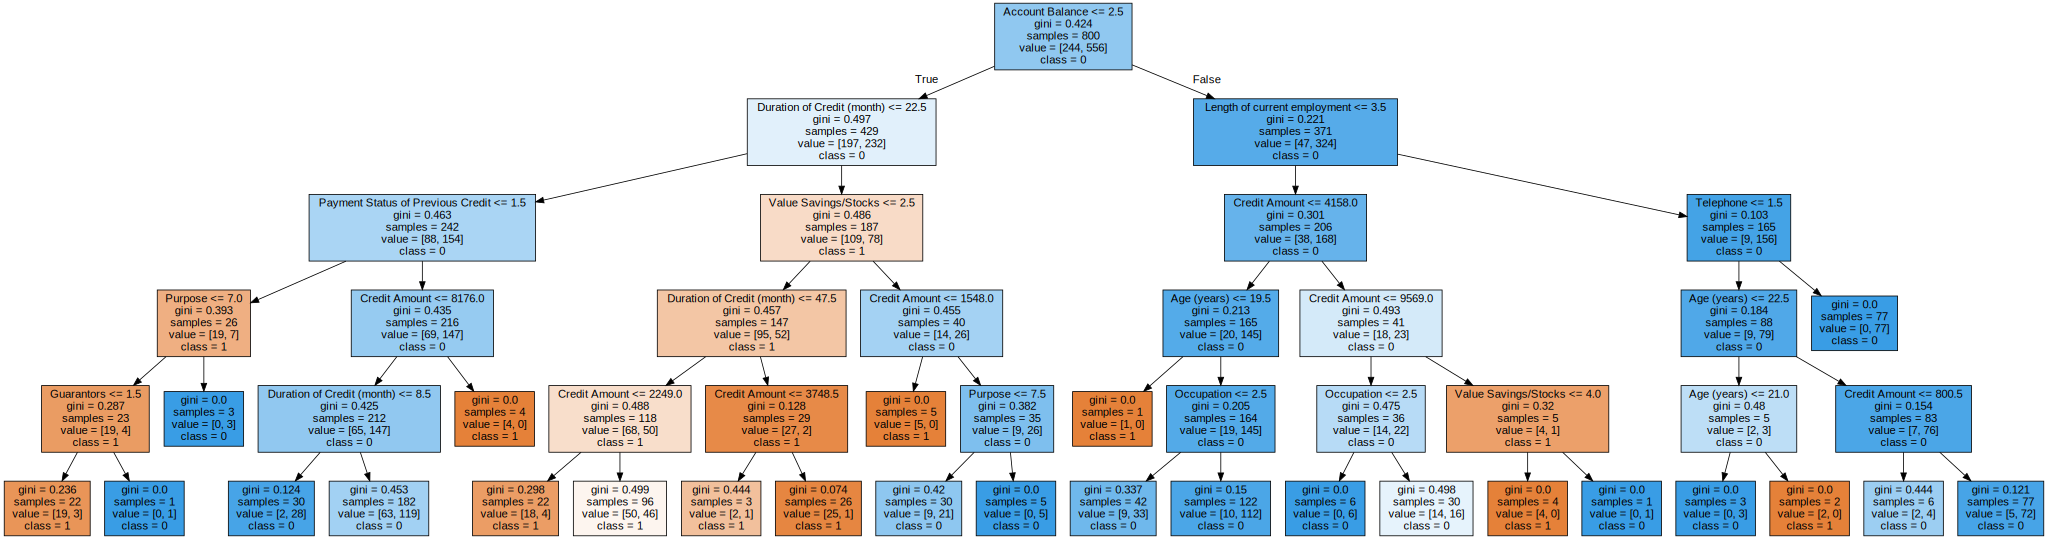

In [ ]:
#filtered data set
import graphviz
#Get unique class values to display on the tree
class_values=dummy_data[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
#filtered data set
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred1 = clf.predict(X_test1)
y_pred1

array(['1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1',
       '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1

In [ ]:
#filtered data set
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test1, y_pred1)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 25  31]
 [ 20 124]]
TP:  124 , FP:  31 , TN:  25 , FN: 20


In [ ]:
#filtered data set
clf.score(X_test1, y_test1)

0.745

In [ ]:
#filtered data set
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        56
           1       0.80      0.86      0.83       144

    accuracy                           0.74       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.73      0.74      0.74       200



In [ ]:
#unfiltered dataset
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_prednew = nb.predict(X_test)

In [ ]:
#unfiltered dataset
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


In [ ]:
#unfiltered dataset
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [244. 556.]
Log prior probability for classes  [-1.1874435  -0.36384343]
Log conditional probability for each feature given a class
 [[-7.67171185 -5.10445416 -7.54302048 -7.30118479 -0.02347235 -7.80463031
  -7.17341068 -7.1971585  -7.35912783 -8.18110788 -7.29233518 -7.37495094
  -4.79212768 -7.37335732 -7.66956823 -7.99878632 -7.23803613 -8.1846857
  -7.98695187 -8.29844459]
 [-6.98517114 -5.09962532 -7.04855235 -7.0511996  -0.03045059 -7.2189166
  -6.81136381 -6.98022063 -7.0452531  -7.9073726  -7.00839151 -7.22915694
  -4.45954175 -7.04393645 -7.38291181 -7.67955978 -6.98703391 -7.90581376
  -7.71367554 -7.99879021]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#unfiltered dataset
nb.predict(X_test)

array(['0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1

In [ ]:
#unfiltered dataset
nb.score(X_test,y_test)

0.635

In [ ]:
#unfiltered dataset
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
TN, FP, FN, TP=cf.ravel()
print ("TP: ", TP,", FP: ", FP,", TN: ", TN,", FN:", FN)

Confusion Matrix
[[ 17  39]
 [ 21 123]]
TP:  123 , FP:  39 , TN:  17 , FN: 21


In [ ]:
#unfiltered dataset
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36        56
           1       0.76      0.85      0.80       144

    accuracy                           0.70       200
   macro avg       0.60      0.58      0.58       200
weighted avg       0.67      0.70      0.68       200



In [ ]:
#filtered dataset
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb1 = MultinomialNB()

#Train the model using the training sets
nb1.fit(X_train1, y_train1)

#Predict the response for test dataset
y_prednew1 = nb1.predict(X_test1)

In [ ]:
#filtered dataset

print ("Total Columns (including class)",len(dummy_data.columns))

Total Columns (including class) 17


In [ ]:
#filtered dataset
print("Number of features used ",nb1.n_features_)
print("Classes ",nb1.classes_)
print("Number of records for classes ",nb1.class_count_)
print("Log prior probability for classes ", nb1.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb1.feature_log_prob_)

Number of features used  16
Classes  ['0' '1']
Number of records for classes  [244. 556.]
Log prior probability for classes  [-1.1874435  -0.36384343]
Log conditional probability for each feature given a class
 [[-7.66966555 -5.10240786 -7.54097418 -7.29913849 -0.02142605 -7.80258401
  -7.17136438 -7.35708153 -8.17906158 -7.37290464 -4.79008138 -7.37131102
  -7.66752192 -7.23598982 -7.98490556 -8.29639829]
 [-6.98250245 -5.09695663 -7.04588366 -7.04853091 -0.0277819  -7.21624791
  -6.80869512 -7.04258441 -7.90470391 -7.22648825 -4.45687306 -7.04126776
  -7.38024312 -6.98436522 -7.71100685 -7.99612152]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#filtered dataset
nb1.predict(X_test1)

array(['0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1

In [ ]:
#filtered dataset
nb1.score(X_test1,y_test1)

0.64

In [ ]:
#filtered dataset
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(y_test1, y_pred1)
print ("Confusion Matrix")
print(cf1)
TN1, FP1, FN1, TP1=cf1.ravel()
print ("TP: ", TP1,", FP: ", FP1,", TN: ", TN1,", FN:", FN1)

Confusion Matrix
[[ 25  31]
 [ 20 124]]
TP:  124 , FP:  31 , TN:  25 , FN: 20


In [ ]:
#filtered dataset
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        56
           1       0.80      0.86      0.83       144

    accuracy                           0.74       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.73      0.74      0.74       200



In [ ]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["Creditability","Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"
          ,"Guarantors","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", 
          "Telephone","Foreign Worker"]

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

Duration of Credit (month)  Credit Amount  Instalment per cent  \
0                          18.0         1049.0                  4.0   
1                           9.0         2799.0                  2.0   
2                          12.0          841.0                  2.0   
3                          12.0         2122.0                  3.0   
4                          12.0         2171.0                  4.0   
..                          ...            ...                  ...   
995                        24.0         1987.0                  2.0   
996                        24.0         2303.0                  4.0   
997                        21.0        12680.0                  4.0   
998                        12.0         6468.0                  2.0   
999                        30.0         6350.0                  4.0   

    Duration in Current address  Age (years)  No of Credits at this Bank  \
0                             4         21.0                         1.0   
1                             2         36.0                         2.0   
2                             4         23.0                         1.0   
3                             2         39.0                         2.0   
4                             4         38.0                         2.0   
..                          ...          ...                         ...   
995                           4         21.0                         1.0   
996                           1         45.0                         1.0   
997                           4         30.0                         1.0   
998                           1         52.0                         1.0   
999                           4         31.0                         1.0   

     No of dependents  Creditability_0  Creditability_1  Account Balance_1  \
0                 1.0                0                1                  1   
1                 2.0                0                1                  1   
2                 1.0                0                1                  0   
3                 2.0                0                1                  1   
4                 1.0                0                1                  1   
..                ...              ...              ...                ...   
995               2.0                1                0                  1   
996               1.0                1                0                  1   
997               1.0                1                0                  0   
998               1.0                1                0                  0   
999               1.0                1                0                  1   

     ...  Type of apartment_2  Type of apartment_3  Occupation_1  \
0    ...                    0                    0             0   
1    ...                    0                    0             0   
2    ...                    0                    0             0   
3    ...                    0                    0             0   
4    ...                    1                    0             0   
..   ...                  ...                  ...           ...   
995  ...                    0                    0             0   
996  ...                    1                    0             0   
997  ...                    0                    1             0   
998  ...                    1                    0             0   
999  ...                    1                    0             0   

     Occupation_2  Occupation_3  Occupation_4  Telephone_1  Telephone_2  \
0               0             1             0            1            0   
1               0             1             0            1            0   
2               1             0             0            1            0   
3               1             0             0            1            0   
4               1             0             0            1            0   
..            ...           ...    

In [ ]:
from sklearn.model_selection import train_test_split
class_col_name="Creditability"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.2,random_state=109) # 80% training and 20% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [238. 562.]
Log prior probability for classes  [-1.21234105 -0.35310988]
Log conditional probability for each feature given a class
 [[ -5.06171234  -0.02071828  -7.10099059  -4.71875629  -7.93403432
   -8.10956782  -9.0388578   -9.30496739 -11.22677999  -9.99811457
  -10.71595437 -10.53363281  -8.81384684 -10.62064419  -9.95048652
   -9.43502052 -11.22677999 -11.91992717  -9.81986634  -9.72270259
  -12.32539228 -11.51446206 -10.82131488 -13.01853946 -10.62064419
   -8.55839504 -10.49281081 -11.31379137 -11.91992717 -10.37948213
  -10.87847329  -9.70435345  -9.28086984 -10.27769943  -9.68633495
  -10.82131488  -9.17908715  -9.00215644 -10.71595437  -8.32261491
  -11.07262931 -11.6322451  -10.31048926  -9.32966     -9.97401702
   -9.21187697  -9.72270259  -9.72270259  -9.28086984  -9.79966363
   -9.88304524 -11.00363644  -8.51872979  -9.70435345  -8.67473404
  -10.24595074 -12.32539228  -9.72270259  -8.7558595

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[37 25]
 [46 92]]
TP:  92 , FP:  25 , TN:  37 , FN: 46


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.60      0.51        62
           1       0.79      0.67      0.72       138

    accuracy                           0.65       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.68      0.65      0.66       200



class Names ['1' '0']


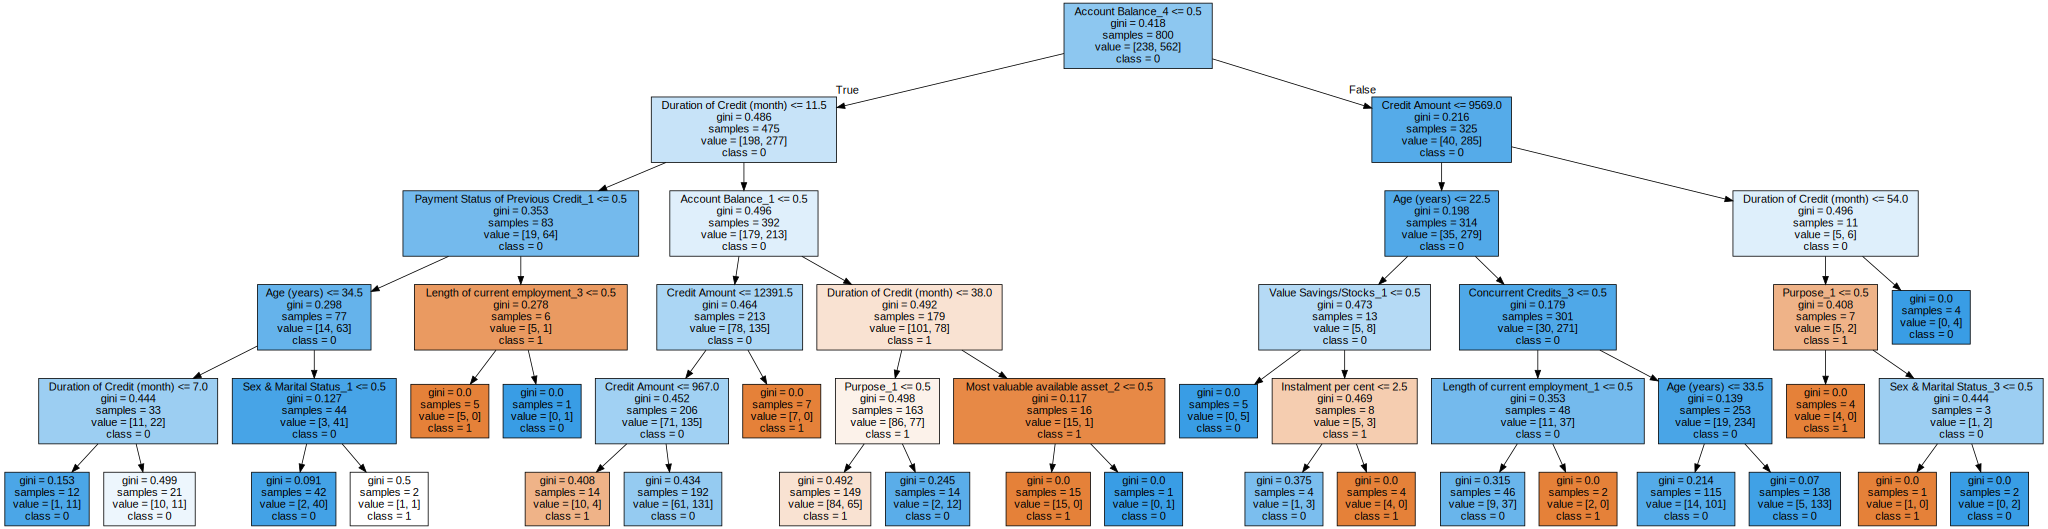

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)
y_pred

array(['1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1',
       '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.36      0.35        56
           1       0.75      0.74      0.75       144

    accuracy                           0.64       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.64      0.64      0.64       200



In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]